In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
sales = pd.read_csv('/content/Coffee .csv')
sales.head(3)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate


In [25]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [26]:
sales.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


# Performing Feature Engeneering :-

In [27]:
# Converting the Date Column into Day, Month & Year column :-

sales['date'] = pd.to_datetime(sales['date'])
sales['Day'] = sales['date'].dt.day
sales['Month'] = sales['date'].dt.month
sales['Year'] = sales['date'].dt.year
sales['DayofWeek'] = sales['date'].dt.day

In [28]:
sales.head(2)

,date,datetime,cash_type,card,money,coffee_name,Day,Month,Year,DayofWeek
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,1,3,2024,1
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1,3,2024,1


# Performing Exploratery Data Analysis :-

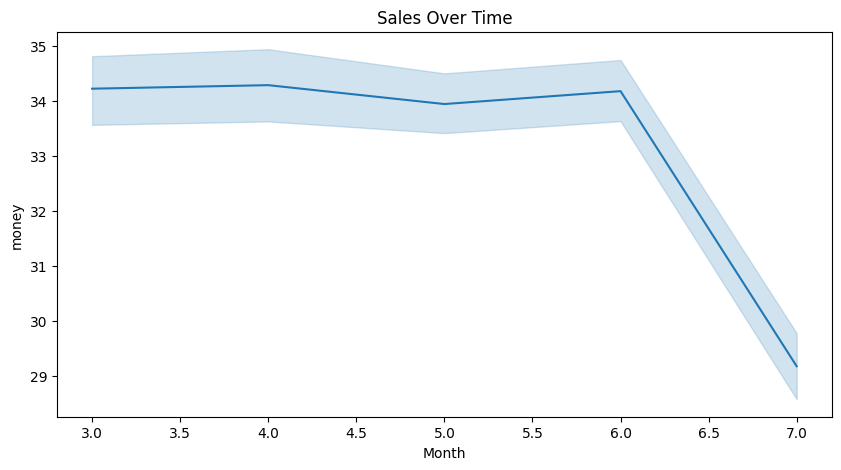

In [31]:
# Sales over time :-

plt.figure(figsize = (10, 5))
sns.lineplot(data = sales, x = 'Month', y = 'money')
plt.title('Sales Over Time')
plt.show()

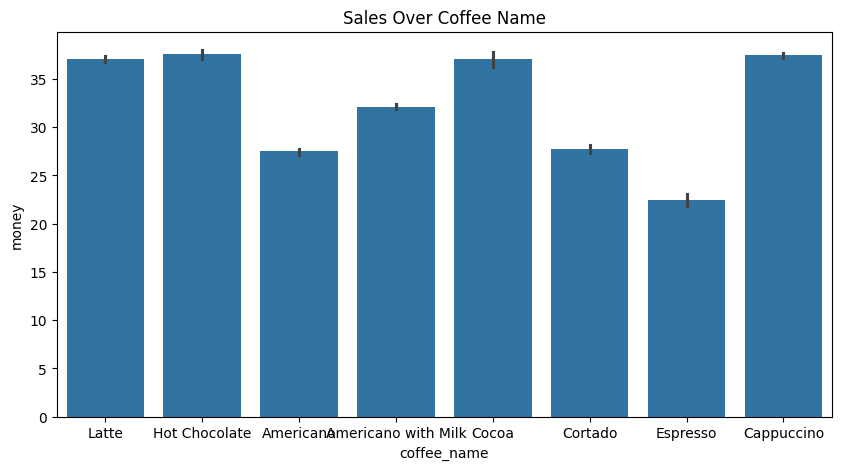

In [32]:
# Sales over Coffee name :-

plt.figure(figsize = (10, 5))
sns.barplot(data = sales, x = 'coffee_name', y = 'money')
plt.title('Sales Over Coffee Name')
plt.show()

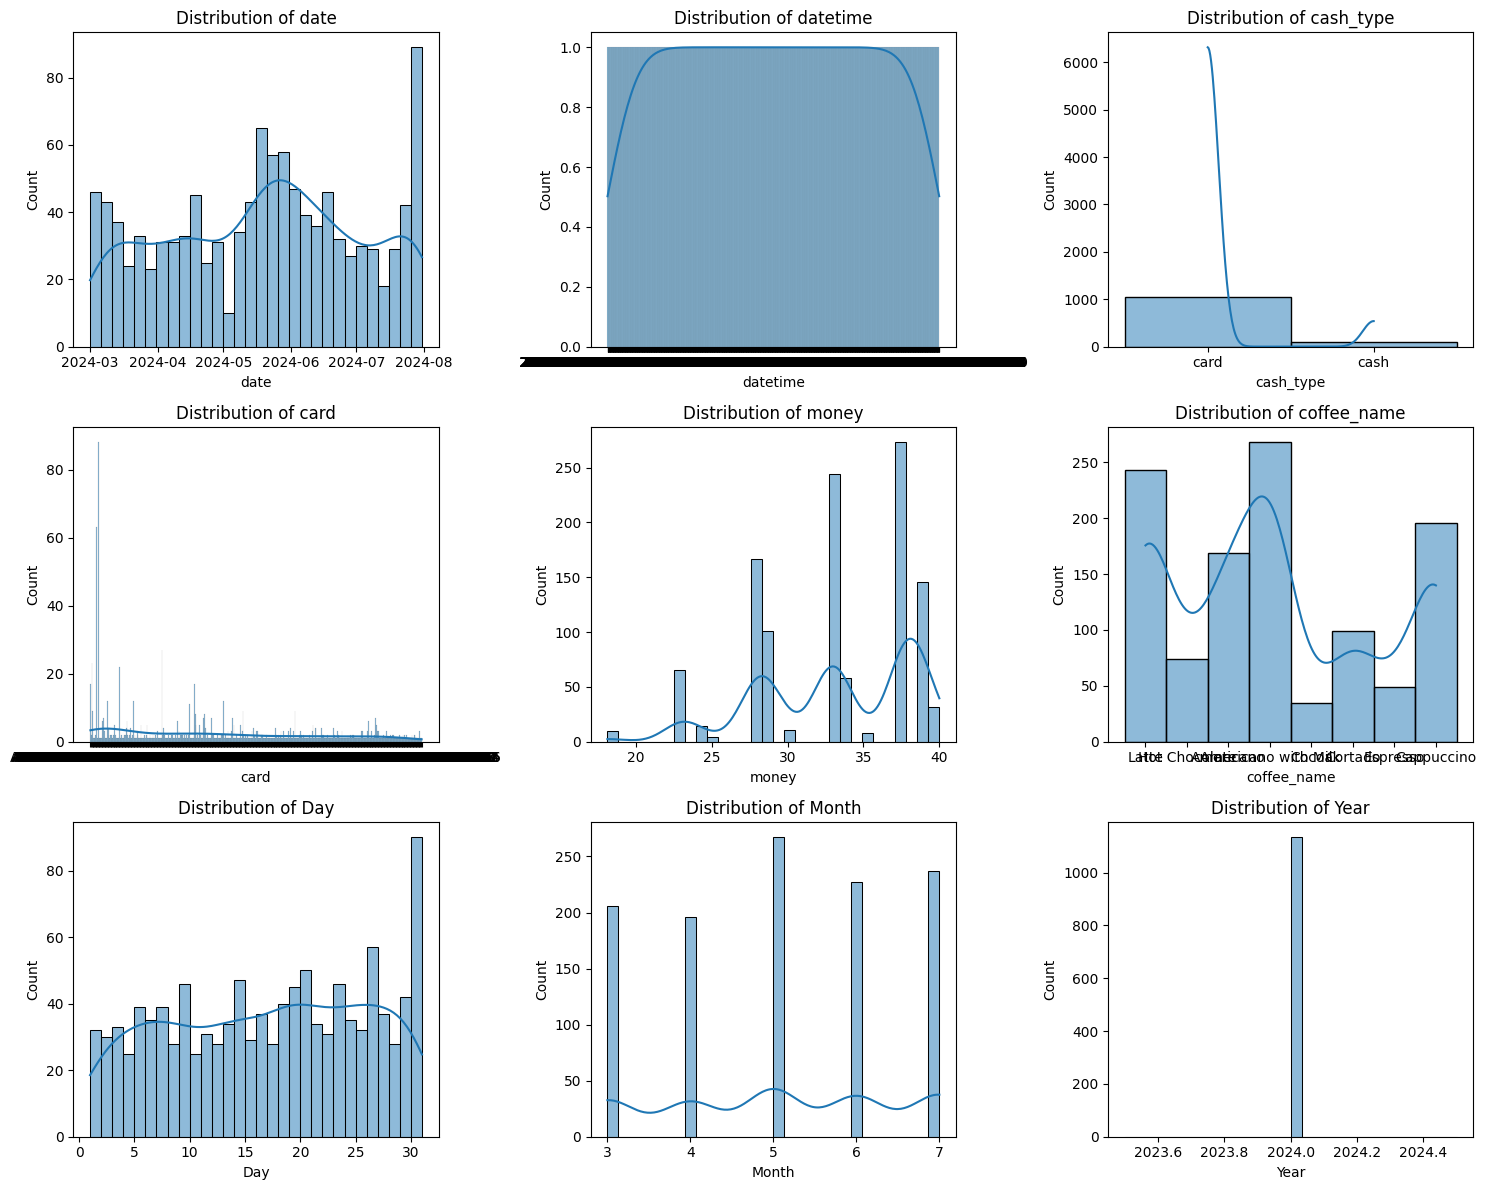

In [33]:
# Plot distribution for all numeric features
plt.figure(figsize=(15, 12))
for i, column in enumerate(sales.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(sales[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

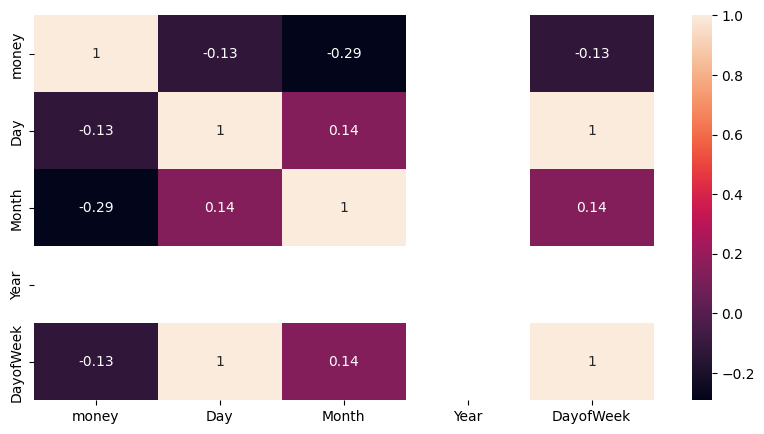

In [34]:
# co-realtion of the data :-

plt.figure(figsize = (10, 5))
sns.heatmap(sales.select_dtypes(include=np.number).corr(), annot = True)
plt.show()

In [35]:
# Removing the Unwanted columns from the data set :-

sales.drop(['date', 'datetime', 'card'], axis = 1, inplace = True)

In [38]:
sales

,cash_type,money,coffee_name,Day,Month,Year,DayofWeek
0,card,38.70,Latte,1,3,2024,1
1,card,38.70,Hot Chocolate,1,3,2024,1
2,card,38.70,Hot Chocolate,1,3,2024,1
3,card,28.90,Americano,1,3,2024,1
4,card,38.70,Latte,1,3,2024,1
...,...,...,...,...,...,...,...
1128,card,23.02,Cortado,31,7,2024,31
1129,card,27.92,Americano with Milk,31,7,2024,31
1130,card,32.82,Latte,31,7,2024,31
1131,card,32.82,Latte,31,7,2024,31


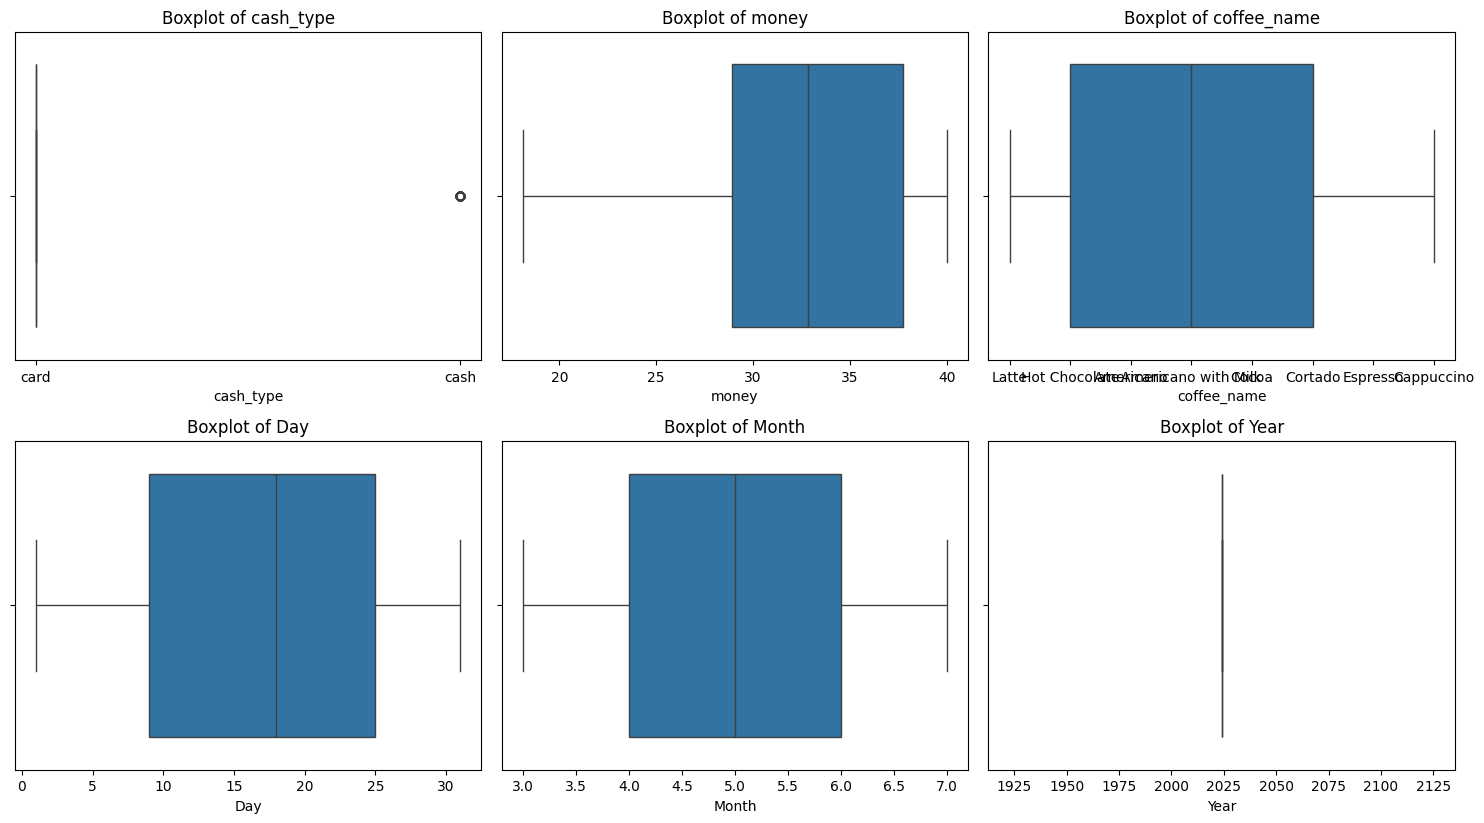

In [36]:
# Box-Plot to detect the outliers in the dataset

plt.figure(figsize=(15, 12))
for i, column in enumerate(sales.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=sales, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [39]:
# Finding the Outliers Using IQR method :-

for column in sales.select_dtypes(include=np.number).columns:
  Q1 = sales[column].quantile(0.25)
  Q3 = sales[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = sales[(sales[column] < lower_bound) | (sales[column] > upper_bound)]
  print(f"{column}: {outliers.shape[0]} outliers")

money: 0 outliers
Day: 0 outliers
Month: 0 outliers
Year: 0 outliers
DayofWeek: 0 outliers


In [40]:
# Using One-Hot Encoding for the Categorical Columns :-

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(sales[['coffee_name', 'cash_type']])

In [42]:
sales = pd.concat([sales.drop(['coffee_name', 'cash_type'], axis = 1), pd.DataFrame(encoded_data.toarray(), columns = encoder.get_feature_names_out(['coffee_name', 'cash_type']))], axis = 1)

In [43]:
sales

,money,Day,Month,Year,DayofWeek,coffee_name_Americano,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte,cash_type_card,cash_type_cash
0,38.70,1,3,2024,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,38.70,1,3,2024,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,38.70,1,3,2024,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,28.90,1,3,2024,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,38.70,1,3,2024,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,23.02,31,7,2024,31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1129,27.92,31,7,2024,31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1130,32.82,31,7,2024,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1131,32.82,31,7,2024,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [44]:
# Distinguishing the data into INdependent & Dependent Variables :-

X = sales.drop('money', axis = 1)
Y = sales['money']

In [45]:
# Splitting the data into train-test split :-

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [46]:
# Importing the Models for our Dataset :-

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

In [47]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [48]:
best_model = None
best_r2_score = -float('inf')
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    current_r2_score = model.score(X_test, Y_test)
    print(f"{name}: R2 Score = {current_r2_score}")
    if current_r2_score > best_r2_score:
        best_r2_score = current_r2_score
        best_model = model

print(f"Best Model: {best_model}")

Linear Regression: R2 Score = 0.9234808424757313
Decision Tree: R2 Score = 0.9990957177594469
Random Forest: R2 Score = 0.9987339197975896
Gradient Boosting: R2 Score = 0.9979153035002294
Support Vector Machine: R2 Score = -0.030340233690789642
K-Nearest Neighbors: R2 Score = 0.43240564701001794
Best Model: DecisionTreeRegressor()


# Taking Decisiontree Regresser as the best model for best accuracy :-

In [49]:
tree = DecisionTreeRegressor()

In [50]:
# Applying Hyper parameter tuning  :-

# Define parameter grid for Decision Tree
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Applying GridSearchCV :-

In [53]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2')

grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2250 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [None, 5, 10, 20, 30],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [54]:
# Best model
tree_best_model = grid_search.best_estimator_

In [55]:
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score (CV):", grid_search.best_score_)

Best Parameters: {'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best R2 Score (CV): 0.9977068740585068


# Saving the model using Pickle :-

In [57]:
import pickle

with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(tree_best_model, file)

In [58]:
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)